In [1]:
#importing packages
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#reading ccsv file
train_data=pd.read_csv('train.csv')

In [3]:
#looking the data
train_data.head(5)

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [4]:
#finding number of training examples
m=train_data.shape[0]

In [5]:
#converting dataframe to numpy array
train_data=np.array(train_data)

In [6]:
#correct even not normalised....no need to normalise in this case
def normalise(temp):
    return tf.keras.utils.normalize(temp)

In [7]:
#extracting x and y from train_data (converted to tensorflow.Variable)
x_train=tf.Variable(train_data[:,0],dtype='float32')
y_train=tf.Variable(train_data[:,1],dtype='float32')

Text(0.5, 1.0, 'Dummy Data Set')

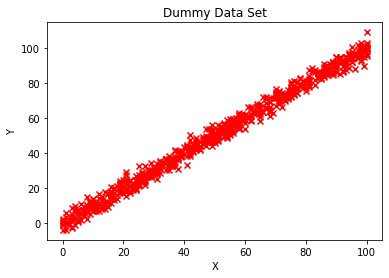

In [8]:
#Visualizing the data
plt.scatter(x_train,y_train,marker='x',color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Dummy Data Set")

In [9]:
#cost functin
def cost(x_train,y_train,theta):
    h=tf.multiply(x_train,theta)
    cost=tf.reduce_mean(tf.pow(h-y_train,2))/2
    return cost

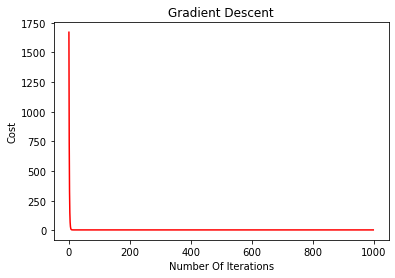

In [10]:
theta=tf.Variable(0.0) #initial weight
epochs=1000 #setting epoches to 1000
alpha=0.0001 #learning rate set to 0.0001 (cost becomes Nan when alpha=0.001)
cost_list=[]
for epoch in range(epochs):
    with tf.GradientTape() as t:
        curr_cost=cost(x_train,y_train,theta)
    dw=t.gradient(curr_cost,theta)
    theta.assign_sub(alpha*dw)
    cost_list.append(np.array(curr_cost))
    
plt.show()
plt.xlabel("Number Of Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent")
plt.plot(cost_list,color='r')

In [11]:
#converting tensor to np array so that can be used in plt.plot
theta=np.array(theta)
x_train=np.array(x_train)

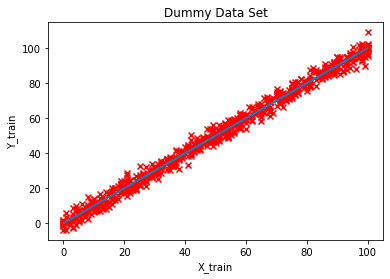

In [12]:
#plot training dataset with regression
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.title('Dummy Data Set')
plt.scatter(np.array(x_train),np.array(y_train),marker='x',color='r')
plt.plot(x_train,x_train*theta)
plt.show()

In [13]:
#train accuracy
y_pred=x_train*theta
error=y_train-y_pred
MSE=np.power(error,2)
print("Accuracy - ",round(100-np.mean(MSE)),"%")

Accuracy -  92 %
